# 論文の成果指標でのtreatment vs control

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


/tmp/ipykernel_259248/1070343855.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()
/tmp/ipykernel_259248/1070343855.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend()


Text(0.05, 1.02, 'c')

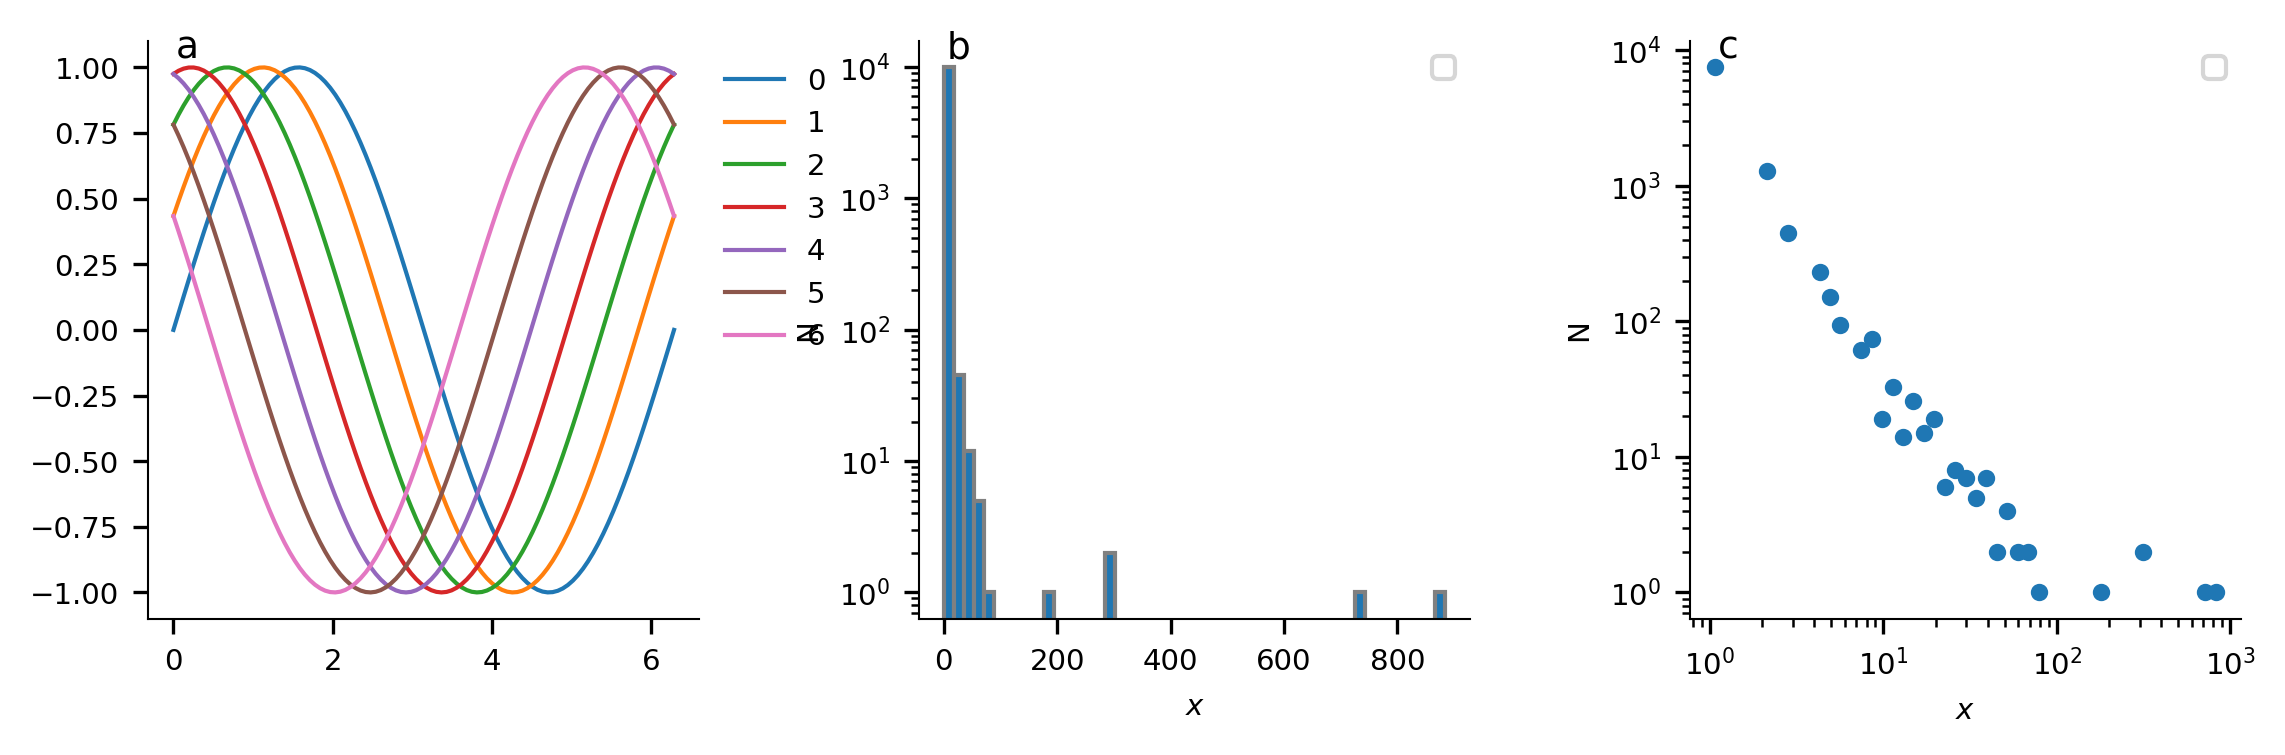

In [52]:
# check format, color and styles
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import pyplot as plt
import scienceplots
plt.rcParams['figure.dpi'] = 300
plt.style.use(['nature']) # start with ['science'] then ['nature']. use 'notebook', 'no-latex', 'cjk-jp-font' if needed.
# https://github.com/garrettj403/SciencePlots
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(9,2.5))
fig.subplots_adjust(hspace=0.1, wspace=0.4)

n = 7
x = np.linspace(0, 2*np.pi, 100)
for i in range(n):
    ax1.plot(x, np.sin(x+np.pi/n*i), label=i)
ax1.spines[['right', 'top']].set_visible(False)
ax1.tick_params(which='both', top=False, right=False)
ax1.legend(loc='upper left', bbox_to_anchor=(1,1),frameon=False)
ax1.text(0.05, 1.02, 'a', va='top', transform=ax1.transAxes, fontsize=9)


np.random.seed(0)
a = 2.5  # べき分布の指数（べき指数）
size = 10000  # データのサイズ
data = np.random.zipf(a, size)

ax2.hist(data, bins=50, log=True, edgecolor='gray')
ax2.set_xlabel('$x$')
ax2.set_ylabel('N')
ax2.spines[['right', 'top']].set_visible(False)
ax2.tick_params(which='both', top=False, right=False)
ax2.legend()
ax2.text(0.05, 1.02, 'b', va='top', transform=ax2.transAxes, fontsize=9)

bins = np.logspace(np.log10(data.min()), np.log10(data.max()), 50)
hist, bin_edges = np.histogram(data, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax3.scatter(bin_centers, hist, s=10)
ax3.set_xscale('log')  # x軸を対数スケールに設定
ax3.set_yscale('log')  # y軸を対数スケールに設定
ax3.set_xlabel('$x$')
ax3.set_ylabel('N')
ax3.spines[['right', 'top']].set_visible(False)
ax3.tick_params(which='both', top=False, right=False)
ax3.legend()
ax3.text(0.05, 1.02, 'c', va='top', transform=ax3.transAxes, fontsize=9)

In [53]:
treatment_collab_df = pd.read_pickle('/disks/qnap3/users/21-tomokiyo/masters_thesis/data/guideline_paper/all_guideline_matching/guideline_menber_paper_collab_label.pickle')
control_collab_df = pd.read_pickle('/disks/qnap3/users/21-tomokiyo/masters_thesis/data/guideline_paper/all_guideline_matching/control_menber_paper_collab_label.pickle')

In [54]:
treatment_collab_df['log_c2'] = np.log10(treatment_collab_df['c2']+1)
control_collab_df['log_c2'] = np.log10(control_collab_df['c2']+1)


In [55]:
treat_paper_df1 = treatment_collab_df[(treatment_collab_df['year']>=2016) & (treatment_collab_df['year']<=2021)]
control_paper_df1 = control_collab_df[(control_collab_df['year']>=2016) & (control_collab_df['year']<=2021)]


In [56]:
treat_paper_df_tmp0 = treat_paper_df1[(treat_paper_df1['collab']=='non_collab')]
treat_paper_df_tmp1 = treat_paper_df1[(treat_paper_df1['collab']=='2005-09_collab')]
treat_paper_df_tmp2 = treat_paper_df1[(treat_paper_df1['collab']=='2010-15_collab')]
treat_paper_df_tmp3 = treat_paper_df1[(treat_paper_df1['collab']=='2016-21_collab')]
treat_paper_df_tmp4 = treat_paper_df1[(treat_paper_df1['collab']=='2022-23_collab')]

In [57]:
treat_paper_df_tmp0_d = treat_paper_df_tmp0[~treat_paper_df_tmp0['D_score'].isnull()]
treat_paper_df_tmp1_d = treat_paper_df_tmp1[~treat_paper_df_tmp1['D_score'].isnull()]
treat_paper_df_tmp2_d = treat_paper_df_tmp2[~treat_paper_df_tmp2['D_score'].isnull()]
treat_paper_df_tmp3_d = treat_paper_df_tmp3[~treat_paper_df_tmp3['D_score'].isnull()]
treat_paper_df_tmp4_d = treat_paper_df_tmp4[~treat_paper_df_tmp4['D_score'].isnull()]

In [58]:
treat_paper_df_tmp0_d.shape, treat_paper_df_tmp1_d.shape, treat_paper_df_tmp2_d.shape, treat_paper_df_tmp3_d.shape, treat_paper_df_tmp4_d.shape

((4754, 6), (184, 6), (246, 6), (326, 6), (0, 6))

In [59]:
184+246+326

756

In [60]:
treat_paper_df_tmp0_d['D_score'].mean(), treat_paper_df_tmp1_d['D_score'].mean(), treat_paper_df_tmp2_d['D_score'].mean(), treat_paper_df_tmp3_d['D_score'].mean()

(0.00044775296732132573,
 -0.0009289691654466508,
 -0.0011549064401734177,
 0.0035051816353779135)

In [61]:
control_paper_df_tmp0 = control_paper_df1[(control_paper_df1['collab']=='non_collab')]
control_paper_df_tmp1 = control_paper_df1[(control_paper_df1['collab']=='2005-09_collab')]
control_paper_df_tmp2 = control_paper_df1[(control_paper_df1['collab']=='2010-15_collab')]
control_paper_df_tmp3 = control_paper_df1[(control_paper_df1['collab']=='2016-21_collab')]
control_paper_df_tmp4 = control_paper_df1[(control_paper_df1['collab']=='2022-23_collab')]

In [62]:
control_paper_df_tmp0_d = control_paper_df_tmp0[~control_paper_df_tmp0['D_score'].isnull()]
control_paper_df_tmp1_d = control_paper_df_tmp1[~control_paper_df_tmp1['D_score'].isnull()]
control_paper_df_tmp2_d = control_paper_df_tmp2[~control_paper_df_tmp2['D_score'].isnull()]
control_paper_df_tmp3_d = control_paper_df_tmp3[~control_paper_df_tmp3['D_score'].isnull()]
control_paper_df_tmp4_d = control_paper_df_tmp4[~control_paper_df_tmp4['D_score'].isnull()]

In [63]:
control_paper_df_tmp0_d.shape, control_paper_df_tmp1_d.shape, control_paper_df_tmp2_d.shape, control_paper_df_tmp3_d.shape, control_paper_df_tmp4_d.shape

((4213, 6), (127, 6), (103, 6), (96, 6), (0, 6))

In [65]:
import scipy.stats as stats

# サンプルデータ
treat_data = treat_paper_df_tmp1_d['D_score'].tolist()+treat_paper_df_tmp2_d['D_score'].tolist()+treat_paper_df_tmp3_d['D_score'].tolist()     
control_data = control_paper_df_tmp1_d['D_score'].tolist()+control_paper_df_tmp2_d['D_score'].tolist()  +control_paper_df_tmp3_d['D_score'].tolist()    


treat_data = treat_paper_df_tmp0_d['D_score'].tolist()
control_data = control_paper_df_tmp0_d['D_score'].tolist()


# 1. 正規性の確認（Shapiro-Wilk検定）
treat_normality = stats.shapiro(treat_data)
control_normality = stats.shapiro(control_data)

print("Treatment group Shapiro-Wilk test: W =", treat_normality.statistic, ", p-value =", treat_normality.pvalue)
print("Control group Shapiro-Wilk test: W =", control_normality.statistic, ", p-value =", control_normality.pvalue)

if treat_normality.pvalue < 0.05 or control_normality.pvalue < 0.05:
    print("データが正規分布ではない可能性があります。非パラメトリック検定を検討してください。")

# 2. 分散の等質性の確認（F検定）
levene_test = stats.levene(treat_data, control_data)
print("Levene's test for equal variances: W =", levene_test.statistic, ", p-value =", levene_test.pvalue)

# 分散の等質性を仮定するか否かでt検定を選択
equal_var = levene_test.pvalue > 0.05

# 3. t検定の実行
t_test_result = stats.ttest_ind(treat_data, control_data, equal_var=equal_var)
print("t-test result: t =", t_test_result.statistic, ", p-value =", t_test_result.pvalue)

# 結果の解釈
if t_test_result.pvalue < 0.05:
    print("有意差があります（p < 0.05）。")
else:
    print("有意差はありません（p >= 0.05）。")

# 4. 非正規性が疑われる場合は非パラメトリック検定を実施
if treat_normality.pvalue < 0.05 or control_normality.pvalue < 0.05:
    mannwhitney_result = stats.mannwhitneyu(treat_data, control_data, alternative='greater')
    print("Mann-Whitney U test: U =", mannwhitney_result.statistic, ", p-value =", mannwhitney_result.pvalue)
    if mannwhitney_result.pvalue < 0.05:
        print("非パラメトリック検定でも有意差があります（p < 0.05）。")
    else:
        print("非パラメトリック検定では有意差はありません（p >= 0.05）。")

Treatment group Shapiro-Wilk test: W = 0.07748411556194734 , p-value = 1.2921340214435506e-92
Control group Shapiro-Wilk test: W = 0.06600211470829276 , p-value = 9.85496714793689e-90
データが正規分布ではない可能性があります。非パラメトリック検定を検討してください。
Levene's test for equal variances: W = 1.9461375259083982 , p-value = 0.16303823667778805
t-test result: t = 1.1944620816661404 , p-value = 0.23232886568267067
有意差はありません（p >= 0.05）。
Mann-Whitney U test: U = 10502291.0 , p-value = 3.3191763515045826e-05
非パラメトリック検定でも有意差があります（p < 0.05）。


In [66]:
# Cliff's Delta を計算する関数
def cliffs_delta(x, y):
    n_x = len(x)
    n_y = len(y)
    # 各要素のペアの差分を求める（外積的な計算）
    diff = np.subtract.outer(x, y)  # shape: (n_x, n_y)
    # x > y の場合は +1、x < y の場合は -1、等しい場合は 0 とする
    n_pos = np.sum(diff > 0)
    n_neg = np.sum(diff < 0)
    delta = (n_pos - n_neg) / (n_x * n_y)
    return delta

# サンプルデータ
treat_data = treat_paper_df_tmp1_d['D_score'].tolist()+treat_paper_df_tmp2_d['D_score'].tolist()+treat_paper_df_tmp3_d['D_score'].tolist()     
control_data = control_paper_df_tmp1_d['D_score'].tolist()+control_paper_df_tmp2_d['D_score'].tolist()  +control_paper_df_tmp3_d['D_score'].tolist()    

treat_data = treat_paper_df_tmp0_d['D_score'].tolist()
control_data = control_paper_df_tmp0_d['D_score'].tolist()

delta = cliffs_delta(treat_data, control_data)
print("Cliff's Delta =", delta)

Cliff's Delta = 0.04872931221060761


In [70]:
group_0 = treat_paper_df_tmp1_d['D_score'].tolist()+treat_paper_df_tmp2_d['D_score'].tolist()+treat_paper_df_tmp3_d['D_score'].tolist()     
group_1 = control_paper_df_tmp1_d['D_score'].tolist()+control_paper_df_tmp2_d['D_score'].tolist()  +control_paper_df_tmp3_d['D_score'].tolist()    

group_0 = treat_paper_df_tmp0_d['D_score'].tolist()
group_1 = control_paper_df_tmp0_d['D_score'].tolist()

# Leveneの等分散検定
statistic, p_value = stats.levene(group_0, group_1)

print(f"検定統計量: {statistic}")
print(f"p値: {p_value}")

# 有意水準を設定
alpha = 0.05

if p_value > alpha:
    print("p値が有意水準を上回るため、2つの配列の分散は等しいと判断されます。")
else:
    print("p値が有意水準以下のため、2つの配列の分散は等しくないと判断されます。")
    print()

検定統計量: 1.9461375259083982
p値: 0.16303823667778805
p値が有意水準を上回るため、2つの配列の分散は等しいと判断されます。


## logc2+1

In [16]:
treat_paper_df_tmp0_c = treat_paper_df_tmp0[~treat_paper_df_tmp0['log_c2'].isnull()]
treat_paper_df_tmp1_c = treat_paper_df_tmp1[~treat_paper_df_tmp1['log_c2'].isnull()]
treat_paper_df_tmp2_c = treat_paper_df_tmp2[~treat_paper_df_tmp2['log_c2'].isnull()]
treat_paper_df_tmp3_c = treat_paper_df_tmp3[~treat_paper_df_tmp3['log_c2'].isnull()]
treat_paper_df_tmp4_c = treat_paper_df_tmp4[~treat_paper_df_tmp4['log_c2'].isnull()]

In [17]:
treat_paper_df_tmp0_c.shape, treat_paper_df_tmp1_c.shape, treat_paper_df_tmp2_c.shape, treat_paper_df_tmp3_c.shape, treat_paper_df_tmp4_c.shape

((5104, 6), (189, 6), (258, 6), (343, 6), (0, 6))

In [48]:
189+258+343

790

In [18]:
control_paper_df_tmp0_c = control_paper_df_tmp0[~control_paper_df_tmp0['log_c2'].isnull()]
control_paper_df_tmp1_c = control_paper_df_tmp1[~control_paper_df_tmp1['log_c2'].isnull()]
control_paper_df_tmp2_c = control_paper_df_tmp2[~control_paper_df_tmp2['log_c2'].isnull()]
control_paper_df_tmp3_c = control_paper_df_tmp3[~control_paper_df_tmp3['log_c2'].isnull()]
control_paper_df_tmp4_c = control_paper_df_tmp4[~control_paper_df_tmp4['log_c2'].isnull()]

In [19]:
control_paper_df_tmp0_c.shape, control_paper_df_tmp1_c.shape, control_paper_df_tmp2_c.shape, control_paper_df_tmp3_c.shape, control_paper_df_tmp4_c.shape




((4488, 6), (128, 6), (109, 6), (100, 6), (0, 6))

In [49]:
128+109+100

337

In [31]:
import scipy.stats as stats

# サンプルデータ
treat_data = treat_paper_df_tmp1_c['log_c2'].tolist() + treat_paper_df_tmp2_c['log_c2'].tolist() + treat_paper_df_tmp3_c['log_c2'].tolist()  
control_data = control_paper_df_tmp1_c['log_c2'].tolist() + control_paper_df_tmp2_c['log_c2'].tolist()+ control_paper_df_tmp3_c['log_c2'].tolist() 

treat_data = treat_paper_df_tmp0_c['log_c2'].tolist()
control_data = control_paper_df_tmp0_c['log_c2'].tolist()


# 1. 正規性の確認（Shapiro-Wilk検定）
treat_normality = stats.shapiro(treat_data)
control_normality = stats.shapiro(control_data)

print("Treatment group Shapiro-Wilk test: W =", treat_normality.statistic, ", p-value =", treat_normality.pvalue)
print("Control group Shapiro-Wilk test: W =", control_normality.statistic, ", p-value =", control_normality.pvalue)

if treat_normality.pvalue < 0.05 or control_normality.pvalue < 0.05:
    print("データが正規分布ではない可能性があります。非パラメトリック検定を検討してください。")

# 2. 分散の等質性の確認（F検定）
levene_test = stats.levene(treat_data, control_data)
print("Levene's test for equal variances: W =", levene_test.statistic, ", p-value =", levene_test.pvalue)

# 分散の等質性を仮定するか否かでt検定を選択
equal_var = levene_test.pvalue > 0.05

# 3. t検定の実行
t_test_result = stats.ttest_ind(treat_data, control_data, equal_var=equal_var)
print("t-test result: t =", t_test_result.statistic, ", p-value =", t_test_result.pvalue)

# 結果の解釈
if t_test_result.pvalue < 0.05:
    print("有意差があります（p < 0.05）。")
else:
    print("有意差はありません（p >= 0.05）。")

# 4. 非正規性が疑われる場合は非パラメトリック検定を実施
if treat_normality.pvalue < 0.05 or control_normality.pvalue < 0.05:
    mannwhitney_result = stats.mannwhitneyu(treat_data, control_data, alternative='greater')
    print("Mann-Whitney U test: U =", mannwhitney_result.statistic, ", p-value =", mannwhitney_result.pvalue)
    if mannwhitney_result.pvalue < 0.05:
        print("非パラメトリック検定でも有意差があります（p < 0.05）。")
    else:
        print("非パラメトリック検定では有意差はありません（p >= 0.05）。")


Treatment group Shapiro-Wilk test: W = 0.9765381682791268 , p-value = 3.3313800162285278e-28
Control group Shapiro-Wilk test: W = 0.9726965338539258 , p-value = 1.8627931350595858e-28
データが正規分布ではない可能性があります。非パラメトリック検定を検討してください。
Levene's test for equal variances: W = 0.2884928191478963 , p-value = 0.5912004510227694
t-test result: t = -0.05766974791134334 , p-value = 0.9540128927457016
有意差はありません（p >= 0.05）。
Mann-Whitney U test: U = 11475872.0 , p-value = 0.43390092351651044
非パラメトリック検定では有意差はありません（p >= 0.05）。


/opt/conda/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5104.
  res = hypotest_fun_out(*samples, **kwds)


In [32]:
# Cliff's Delta を計算する関数
def cliffs_delta(x, y):
    n_x = len(x)
    n_y = len(y)
    # 各要素のペアの差分を求める（外積的な計算）
    diff = np.subtract.outer(x, y)  # shape: (n_x, n_y)
    # x > y の場合は +1、x < y の場合は -1、等しい場合は 0 とする
    n_pos = np.sum(diff > 0)
    n_neg = np.sum(diff < 0)
    delta = (n_pos - n_neg) / (n_x * n_y)
    return delta

# 計算実行
# サンプルデータ
treat_data = treat_paper_df_tmp1_c['log_c2'].tolist() + treat_paper_df_tmp2_c['log_c2'].tolist() + treat_paper_df_tmp3_c['log_c2'].tolist()  
control_data = control_paper_df_tmp1_c['log_c2'].tolist() + control_paper_df_tmp2_c['log_c2'].tolist()+ control_paper_df_tmp3_c['log_c2'].tolist() 

treat_data = treat_paper_df_tmp0_c['log_c2'].tolist()
control_data = control_paper_df_tmp0_c['log_c2'].tolist()


delta = cliffs_delta(treat_data, control_data)
print("Cliff's Delta =", delta)

Cliff's Delta = 0.0019641370369749495


In [72]:
group_0 = treat_paper_df_tmp1_c['log_c2'].tolist() + treat_paper_df_tmp2_c['log_c2'].tolist() + treat_paper_df_tmp3_c['log_c2'].tolist()  
group_1 = control_paper_df_tmp1_c['log_c2'].tolist() + control_paper_df_tmp2_c['log_c2'].tolist()+ control_paper_df_tmp3_c['log_c2'].tolist() 

group_0 = treat_paper_df_tmp0_c['log_c2'].tolist()
group_1 = control_paper_df_tmp0_c['log_c2'].tolist()


# Leveneの等分散検定
statistic, p_value = stats.levene(group_0, group_1)

print(f"検定統計量: {statistic}")
print(f"p値: {p_value}")

# 有意水準を設定
alpha = 0.05

if p_value > alpha:
    print("p値が有意水準を上回るため、2つの配列の分散は等しいと判断されます。")
else:
    print("p値が有意水準以下のため、2つの配列の分散は等しくないと判断されます。")
    print()

検定統計量: 0.2884928191478963
p値: 0.5912004510227694
p値が有意水準を上回るため、2つの配列の分散は等しいと判断されます。


In [34]:
for_violin_df_c = pd.DataFrame()
for_violin_df_tmp = pd.DataFrame()

for_violin_df_tmp['log_c2'] = treat_paper_df_tmp0_c['log_c2']
for_violin_df_tmp['label'] = 'Non_collab'
for_violin_df_tmp['category'] = 'Treatment'

for_violin_df_c = pd.concat([for_violin_df_c, for_violin_df_tmp])
for_violin_df_tmp = pd.DataFrame()

for_violin_df_tmp['log_c2'] = treat_paper_df_tmp1_c['log_c2']
for_violin_df_tmp['label'] = 'Collab'
for_violin_df_tmp['category'] = 'Treatment'


for_violin_df_c = pd.concat([for_violin_df_c, for_violin_df_tmp])
for_violin_df_tmp = pd.DataFrame()

for_violin_df_tmp['log_c2'] = treat_paper_df_tmp2_c['log_c2']
for_violin_df_tmp['label'] = 'Collab'
for_violin_df_tmp['category'] = 'Treatment'


for_violin_df_c = pd.concat([for_violin_df_c, for_violin_df_tmp])
for_violin_df_tmp = pd.DataFrame()

for_violin_df_tmp['log_c2'] = treat_paper_df_tmp3_c['log_c2']
for_violin_df_tmp['label'] = 'Collab'
for_violin_df_tmp['category'] = 'Treatment'


for_violin_df_c = pd.concat([for_violin_df_c, for_violin_df_tmp])





for_violin_df_tmp = pd.DataFrame()

for_violin_df_tmp['log_c2'] = control_paper_df_tmp0_c['log_c2']
for_violin_df_tmp['label'] = 'Non_collab'
for_violin_df_tmp['category'] = 'Control'

for_violin_df_c = pd.concat([for_violin_df_c, for_violin_df_tmp])
for_violin_df_tmp = pd.DataFrame()

for_violin_df_tmp['log_c2'] = control_paper_df_tmp1_c['log_c2']
for_violin_df_tmp['label'] = 'Collab'
for_violin_df_tmp['category'] = 'Control'


for_violin_df_c = pd.concat([for_violin_df_c, for_violin_df_tmp])
for_violin_df_tmp = pd.DataFrame()

for_violin_df_tmp['log_c2'] = control_paper_df_tmp2_c['log_c2']
for_violin_df_tmp['label'] = 'Collab'
for_violin_df_tmp['category'] = 'Control'


for_violin_df_c = pd.concat([for_violin_df_c, for_violin_df_tmp])
for_violin_df_tmp = pd.DataFrame()

for_violin_df_tmp['log_c2'] = control_paper_df_tmp3_c['log_c2']
for_violin_df_tmp['label'] = 'Collab'
for_violin_df_tmp['category'] = 'Control'


for_violin_df_c = pd.concat([for_violin_df_c, for_violin_df_tmp])





In [57]:
for_violin_df_c

,log_c2,label,category
2222,0.000000,non_collab,Treatment
5025,0.000000,non_collab,Treatment
5074,0.301030,non_collab,Treatment
5191,0.000000,non_collab,Treatment
5384,0.602060,non_collab,Treatment
...,...,...,...
10699,1.447158,2016-21_collab,Control
10744,2.045323,2016-21_collab,Control
10845,1.963788,2016-21_collab,Control
10846,1.897627,2016-21_collab,Control


## 可視化

In [35]:
for_violin_df_d = pd.DataFrame()
for_violin_df_tmp = pd.DataFrame()

for_violin_df_tmp['D_score'] = treat_paper_df_tmp0_d['D_score']
for_violin_df_tmp['label'] = 'Non_collab'
for_violin_df_tmp['category'] = 'Treatment'

for_violin_df_d = pd.concat([for_violin_df_d, for_violin_df_tmp])
for_violin_df_tmp = pd.DataFrame()

for_violin_df_tmp['D_score'] = treat_paper_df_tmp1_d['D_score']
for_violin_df_tmp['label'] = 'Collab'
for_violin_df_tmp['category'] = 'Treatment'


for_violin_df_d = pd.concat([for_violin_df_d, for_violin_df_tmp])
for_violin_df_tmp = pd.DataFrame()

for_violin_df_tmp['D_score'] = treat_paper_df_tmp2_d['D_score']
for_violin_df_tmp['label'] = 'Collab'
for_violin_df_tmp['category'] = 'Treatment'


for_violin_df_d = pd.concat([for_violin_df_d, for_violin_df_tmp])
for_violin_df_tmp = pd.DataFrame()

for_violin_df_tmp['D_score'] = treat_paper_df_tmp3_d['D_score']
for_violin_df_tmp['label'] = 'Collab'
for_violin_df_tmp['category'] = 'Treatment'


for_violin_df_d = pd.concat([for_violin_df_d, for_violin_df_tmp])





for_violin_df_tmp = pd.DataFrame()

for_violin_df_tmp['D_score'] = control_paper_df_tmp0_d['D_score']
for_violin_df_tmp['label'] = 'Non_collab'
for_violin_df_tmp['category'] = 'Control'

for_violin_df_d = pd.concat([for_violin_df_d, for_violin_df_tmp])
for_violin_df_tmp = pd.DataFrame()

for_violin_df_tmp['D_score'] = control_paper_df_tmp1_d['D_score']
for_violin_df_tmp['label'] = 'Collab'
for_violin_df_tmp['category'] = 'Control'


for_violin_df_d = pd.concat([for_violin_df_d, for_violin_df_tmp])
for_violin_df_tmp = pd.DataFrame()

for_violin_df_tmp['D_score'] = control_paper_df_tmp2_d['D_score']
for_violin_df_tmp['label'] = 'Collab'
for_violin_df_tmp['category'] = 'Control'


for_violin_df_d = pd.concat([for_violin_df_d, for_violin_df_tmp])
for_violin_df_tmp = pd.DataFrame()

for_violin_df_tmp['D_score'] = control_paper_df_tmp3_d['D_score']
for_violin_df_tmp['label'] = 'Collab'
for_violin_df_tmp['category'] = 'Control'


for_violin_df_d = pd.concat([for_violin_df_d, for_violin_df_tmp])





In [47]:
for_violin_df_d['label'].value_counts()

label
Non_collab    8967
Collab        1082
Name: count, dtype: int64

### 描画

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


Text(0.5, 1.1, 'Disruption')

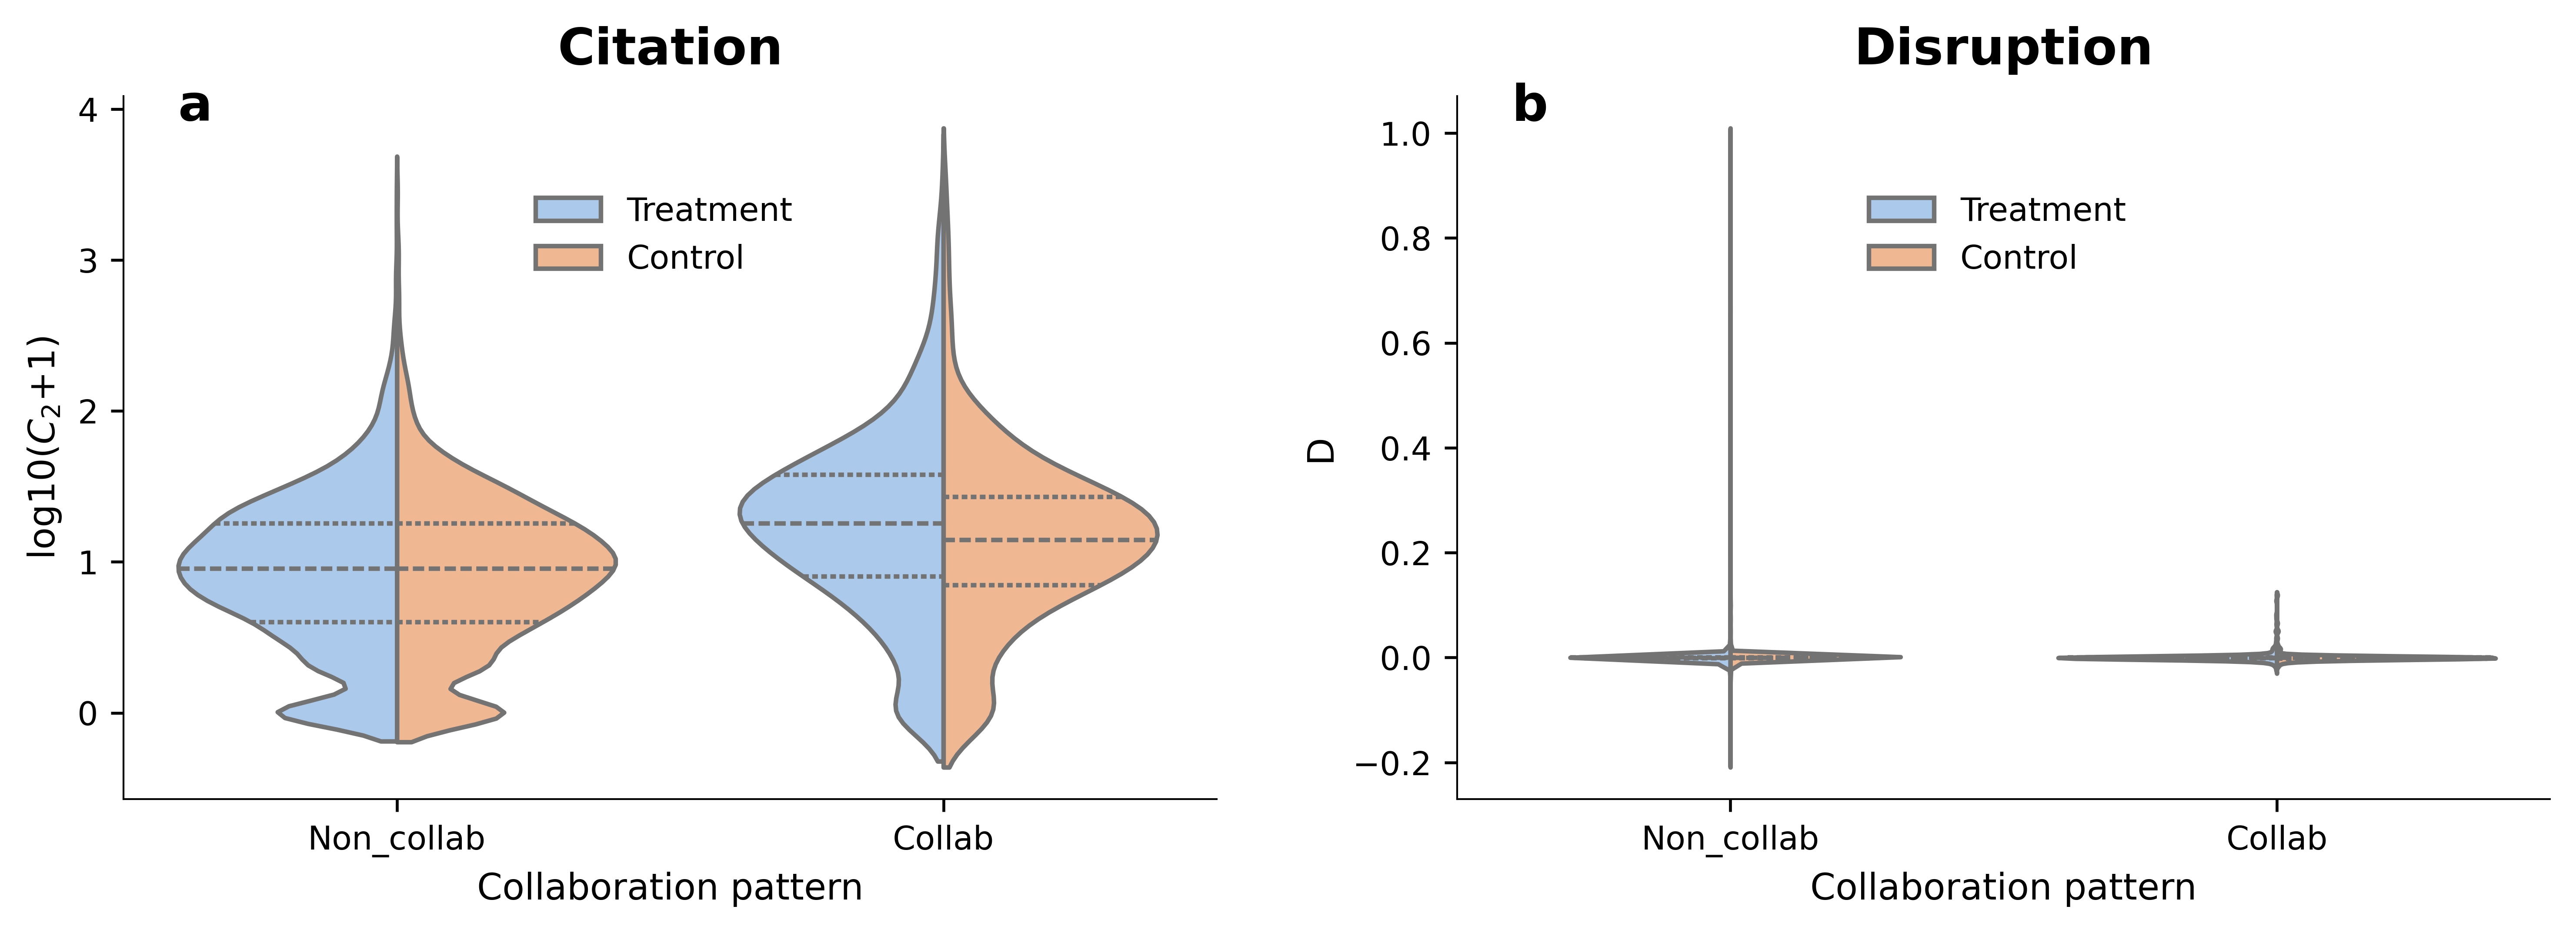

In [43]:
# Plotting


# check format, color and styles
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
import scienceplots
plt.rcParams['figure.dpi'] = 600
plt.style.use(['nature']) # start with ['science'] then ['nature']. use 'notebook', 'no-latex', 'cjk-jp-font' if needed.
# https://github.com/garrettj403/SciencePlots
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,3.5))
fig.subplots_adjust(hspace=0.1, wspace=0.22)

x = np.arange(2011, 2023)

# Plot group 0 with confidence intervals
# Plot group 1 with confidence intervals
# sns.boxplot(data=for_violin_df_c,x="collab",y="log_c2", palette="pastel", ax=ax1)

sns.violinplot(x="label", y='log_c2', hue='category', data=for_violin_df_c, 
               split=True, inner='quartile', palette='pastel', ax=ax1)
ax1.set_xlabel('Collaboration pattern', fontsize=10)
ax1.set_ylabel('log10($C_2$+1)', fontsize=10)
ax1.tick_params(axis='x', labelsize=9)
ax1.tick_params(axis='y', labelsize=9)
#ax1.tick_params(axis='x', rotation=45)


ax1.spines[['right', 'top']].set_visible(False)
ax1.tick_params(which='both', top=False, right=False)
ax1.legend(loc='upper left', bbox_to_anchor=(0.35,0.9),frameon=False, fontsize=9)
ax1.text(0.05, 1.02, 'a', va='top', transform=ax1.transAxes, fontsize=14, fontweight='bold')
ax1.text(0.5, 1.1, 'Citation', va='top', ha='center', transform=ax1.transAxes, fontsize=14, fontweight='bold')

for_violin_df_d['D_score+1'] = np.log10(for_violin_df_d['D_score']+1)
#sns.boxplot(data=for_violin_df_d1,x="collab",y="D_score", palette="pastel", ax=ax2)

sns.violinplot(x="label", y='D_score', hue='category', data=for_violin_df_d, 
               split=True, inner='quartile', palette='pastel', ax=ax2)


ax2.set_xlabel('Collaboration pattern', fontsize=10)
ax2.set_ylabel('D', fontsize=10)
ax2.tick_params(axis='x', labelsize=9)
ax2.tick_params(axis='y', labelsize=9)
#ax2.tick_params(axis='x', rotation=45)



ax2.spines[['right', 'top']].set_visible(False)
ax2.tick_params(which='both', top=False, right=False)
ax2.legend(loc='upper left', bbox_to_anchor=(0.35,0.9),frameon=False, fontsize=9)
ax2.text(0.05, 1.02, 'b', va='top', transform=ax2.transAxes, fontsize=14, fontweight='bold')
ax2.text(0.5, 1.1, 'Disruption', va='top', ha='center', transform=ax2.transAxes, fontsize=14, fontweight='bold')



